In [1]:
from IPython.display import clear_output
!pip install keras-ocr
!pip3 install tensorflow==2.6.0
!pip3 install keras==2.6.0
!pip3 install imgaug
!pip3 install pillow==8.2.0
!pip install pixellib==0.5.2
!pip install labelme2coco==0.1.2
clear_output()

In [2]:
# get the coco weights file
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5


In [3]:
# Clone the git repository of Mask R-CNN
!git clone https://www.github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 29.72 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# In pixellib file segment.py update the BatchNormalization import with this 
#from keras.layers.normalization.batch_normalization import BatchNormalization

In [5]:
# import the modules
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,10)
from google.colab.patches import cv2_imshow
import pixellib
from pixellib.semantic import semantic_segmentation
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, BatchNormalization
import keras_ocr

In [17]:
# Change the directories 
import os
os.getcwd()
os.chdir("/content/gdrive/MyDrive/images")

In [ ]:
# Store the required images in the path list
directory = os.getcwd()
path = []

for filename in os.scandir(directory):
    if filename.is_file():
        path.append(filename.path)

In [ ]:
# Import the instance segmentation lib
from pixellib.instance import instance_segmentation

# Segmentation function 
def segment(path,model):
  
  for i in path:
    os.chdir("/content/gdrive/MyDrive/images/updated images")
    segment_img = instance_segmentation()
    segment_img.load_model(model)
    result = segment_img.segmentImage(i, output_image_name = ("update"+(i[31:-4])+".jpg"))
    
    r = result[0]
    mask = r['masks']
    img = cv2.imread("/content/gdrive/MyDrive/images/updated images/update"+str(i[31:-4])+".jpg")
    read = img.copy()
    for j in range(mask.shape[2]):
      for k in range(read.shape[2]):
        paint = cv2.inpaint(img, read[:,:,k] * mask[:,:,j], 10, cv2.INPAINT_NS)
        os.chdir("/content/gdrive/MyDrive/images/new_images")
      cv2.imwrite("new"+(i[31:-4])+".jpg", paint)

In [ ]:
# Store the weights file in model variable
model = "/content/mask_rcnn_coco.h5"
segment(path, model)

In [ ]:
import math

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

# impaint of text in the images

def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
        return img               
    

In [ ]:
import os
os.getcwd()
os.chdir("/content/gdrive/MyDrive/images/new_images")

In [ ]:
# store the impainted images in painted_img variable
directory = os.getcwd()
painted_img = []

for filename in os.scandir(directory):
    if filename.is_file():
        painted_img.append(filename.path)

In [ ]:
# function to loop through the images and impainting the texts
def paint(painted_img, pipeline):
  for i in painted_img:
    os.chdir("/content/gdrive/MyDrive/images/painted_imgs")
    image = cv2.imread(i)
    imgs = keras_ocr.tools.read(image)
    
    prediction_groups = pipeline.recognize([imgs])[0]
    inpaint_text(imgs, pipline)
    print("Done.")

In [ ]:
pipline = keras_ocr.pipeline.Pipeline()

# **SAMPLE CODE**

In [7]:
from pixellib.instance import instance_segmentation

In [20]:
segment_img = instance_segmentation()
segment_img.load_model("/content/mask_rcnn_coco.h5")
result = segment_img.segmentImage(path1, output_image_name = "updated1.jpg")

Processed image saved successfully in your current working directory.


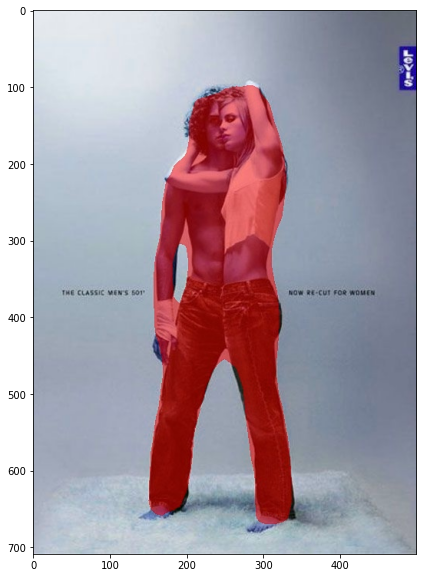

In [21]:
img = cv2.imread("/content/updated1.jpg")
plt.imshow(img)

In [22]:
r = result[0]
mask = r['masks']
read = img.copy()
read.shape[2]

3

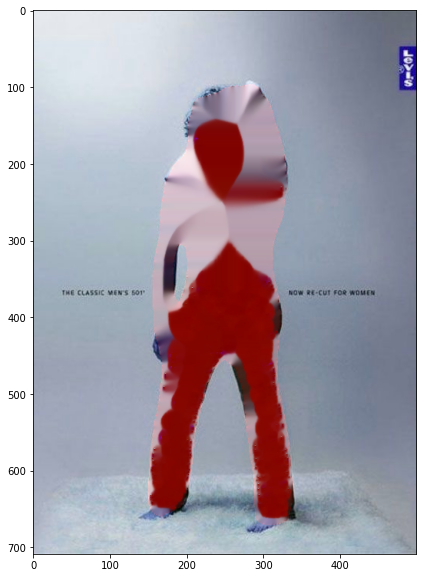

In [23]:
read = img.copy()
for i in range(mask.shape[2]):
  for j in range(read.shape[2]):
    paint = cv2.inpaint(img, read[:,:,j] * mask[:,:,i], 10, cv2.INPAINT_NS)
  plt.imshow(paint)

In [15]:
import math

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)



def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(plt.imshow(img))

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


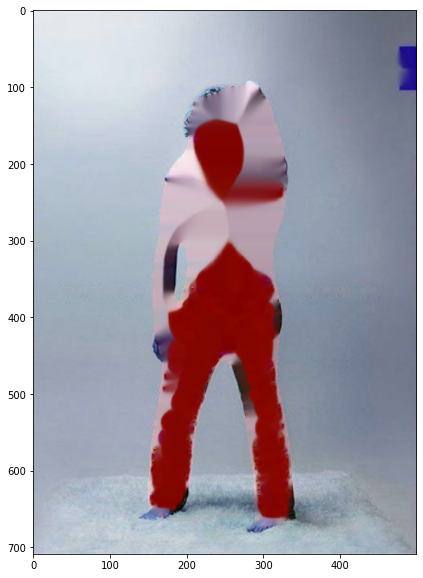

In [24]:
image = paint.copy()

imgs = keras_ocr.tools.read(image)
pipline = keras_ocr.pipeline.Pipeline()
prediction_groups = pipline.recognize([imgs])[0]

# keras_ocr.tools.drawAnnotations(image=imgs, predictions=prediction_groups)
inpaint_text(imgs, pipline)